In [1]:
# Import necessary packages

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read weights

weights = pl.read_parquet('../all_weights_pivot.parquet')
data = pl.read_parquet('../russell_3000_daily.parquet')

In [49]:
data

date,barrid,ticker,price,return,specific_return,specific_risk,historical_beta,predicted_beta,market_cap,daily_volume,bid_ask_spread
date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
2013-07-31,"""USA06Z1""","""MDXG""",6.26,-0.1595,-0.788,55.056916,0.328385,0.34349,6.006157e8,121693.0,0.01
2013-08-01,"""USA06Z1""","""MDXG""",6.32,0.9585,0.365,55.028021,0.334989,0.353329,6.0865392e8,131728.0,0.01
2013-08-02,"""USA06Z1""","""MDXG""",6.31,-0.1582,-0.731,54.807402,0.330713,0.363624,6.0769086e8,43252.0,0.01
2013-08-05,"""USA06Z1""","""MDXG""",6.45,2.2187,1.936,54.76671,0.324494,0.356596,6.211737e8,70944.0,0.02
2013-08-06,"""USA06Z1""","""MDXG""",6.29,-2.4806,-0.528,54.692162,0.366323,0.399196,6.0576474e8,77085.0,0.01
…,…,…,…,…,…,…,…,…,…,…,…
2025-09-09,"""USBRKA2""","""GLIBA""",36.225,-0.4261,1.121,20.842679,0.236481,0.302514,1.3226e8,31025.0,0.11
2025-09-10,"""USBRKA2""","""GLIBA""",36.24,0.0414,2.305,20.954701,0.252015,0.29845,1.3231e8,6298.0,0.21
2025-09-11,"""USBRKA2""","""GLIBA""",37.05,2.2351,0.213,21.480703,0.256752,0.31384,1.3527e8,26857.0,0.25


In [50]:
#weights.select(
    #pl.col("date").n_unique().alias("date_unique"),
    #pl.col("barrid").n_unique().alias("barrid_unique"),
    #pl.len().alias("date"),
#)
from datetime import date
weights.filter(pl.col("date") == date(2013, 10, 11))

date,barrid,bab_weight,meanrev_weight,momentum_weight
date,str,f64,f64,f64
2013-10-11,"""USA0C11""",1.9935e-21,-9.5434e-8,-1.3485e-7
2013-10-11,"""USA0SY1""",8.8849e-22,-1.8276e-8,0.024917
2013-10-11,"""USA1151""",-6.3155e-21,-5.1204e-8,-9.3629e-8
2013-10-11,"""USA11I1""",-9.3740e-22,-9.6132e-8,-1.4429e-7
2013-10-11,"""USA11J1""",-4.6836e-21,-4.1885e-8,-8.7556e-8
…,…,…,…,…
2013-10-11,"""USBBAE1""",-6.9315e-21,-4.5408e-8,null
2013-10-11,"""USBBBA1""",-3.1905e-21,-4.8787e-8,null
2013-10-11,"""USBBCJ1""",-3.2700e-21,-1.4778e-8,null


In [3]:
weights_bab = (
    weights
    .select(["date", "barrid", "bab_weight"])
    .rename({"bab_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("bab").alias("signal"))
)

weights_meanrev = (
    weights
    .select(["date", "barrid", "meanrev_weight"])
    .rename({"meanrev_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("meanrev").alias("signal"))
)

weights_momentum = (
    weights
    .select(["date", "barrid", "momentum_weight"])
    .rename({"momentum_weight": "weight"})
    .filter(pl.col("weight").is_not_null())
    .with_columns(pl.lit("momentum").alias("signal"))
)

In [ ]:
def task_compute_returns(weights: pl.DataFrame, data: pl.DataFrame) -> pl.DataFrame:
    """ 
    Compute the optimal portfolio returns.

    Args:
        weights (pl.DataFrame): Data frame containing barrid, date, and weight columns.
        data (pl.DataFrame): Data frame containing barrid, date, and return columns

    Returns:
        pl.DataFrame: Data frame containing date, fwd_return, and cumulative_fwd_return_columns
    """
    return (                 
        #this should be data joined onto weights because data is more consistently available than weights
        data
        .join(weights, on=['date', 'barrid'], how='left')
        .select('date', 'barrid', 'weight', 'return')
        .with_columns(
            pl.col('return').truediv(100).alias('return_ratio')
        )
        .sort('barrid', 'date')
        #shift signal weights forward in time to line them up with the return_ratios they will be combined with
        .with_columns(
            pl.col('weight').shift(1).over('barrid').alias('previous_weight')
        )
        #have to keep track of the day the signal is from 
        .with_columns(
            pl.col('date').shift(1).over('barrid').alias('previous_weight_date')
        )
        .drop_nulls('previous_weight')
        .with_columns(
            pl.col('return_ratio').mul('previous_weight').alias('evaluated_return')
        )
        .group_by('date', 'previous_weight_date')
        .agg(
            #create candidate totals for every ('date', 'previous_weight_date') pair 
            pl.col('evaluated_return').sum().alias('daily_total_evaluated_return'),
            #measure the distance from 1 of the weight sums of each ('date', 'previous_weight_date') pair 
            pl.col('weight').sum().sub(1).alias('total_weight_error')
        )
        .with_columns(
            #check on whether weight sum error is pos or negative because it's weird 
            pl.col('total_weight_error').abs().alias('abs_weight_error')
        )
        #rank the abs_weight_error within each date and choose the row with the lowest error
        .sort('date', 'abs_weight_error')
        .with_columns(
            pl.col('abs_weight_error').rank('ordinal').over('date').alias('error_rank')
        )
        .filter(pl.col('error_rank') == 1)
        .sort('date')
        .with_columns(
            pl.col('daily_total_evaluated_return').add(1).cum_prod().sub(1).alias('cumulative_return')
        )
        .with_columns(
            pl.col('daily_total_evaluated_return', 'cumulative_return').mul(100)
        )   
    )            

In [5]:
returns_bab = task_compute_returns(weights_bab, data)

returns_bab

date,previous_weight_date,daily_total_evaluated_return,total_weight_error,abs_weight_error,error_rank,cumulative_return
date,date,f64,f64,f64,u32,f64
1995-07-03,1995-06-30,0.339623,-1.8874e-15,1.8874e-15,1,0.339623
1995-07-05,1995-07-03,0.684813,-3.3307e-15,3.3307e-15,1,1.026762
1995-07-06,1995-07-05,1.576081,-4.6629e-15,4.6629e-15,1,2.619026
1995-07-07,1995-07-06,1.160609,-3.7748e-15,3.7748e-15,1,3.810031
1995-07-10,1995-07-07,0.716328,-0.012501,0.012501,1,4.553651
…,…,…,…,…,…,…
2025-09-09,2025-09-08,0.804319,-1.5543e-15,1.5543e-15,1,1851.314229
2025-09-10,2025-09-09,-0.161181,-1.7764e-15,1.7764e-15,1,1848.169075
2025-09-11,2025-09-10,1.411964,-1.3323e-15,1.3323e-15,1,1875.676529


In [6]:
returns_meanrev = task_compute_returns(weights_meanrev, data)

returns_meanrev

date,previous_weight_date,daily_total_evaluated_return,total_weight_error,abs_weight_error,error_rank,cumulative_return
date,date,f64,f64,f64,u32,f64
1995-08-03,1995-08-02,-2.080259,4.0634e-14,4.0634e-14,1,-2.080259
1995-08-04,1995-08-03,-1.923892,3.6637e-14,3.6637e-14,1,-3.96413
1995-08-07,1995-08-04,4.443093,2.2427e-14,2.2427e-14,1,0.302834
1995-08-08,1995-08-07,-2.399445,4.5297e-14,4.5297e-14,1,-2.103877
1995-08-09,1995-08-08,1.449727,-0.021862,0.021862,1,-0.684651
…,…,…,…,…,…,…
2025-09-09,2025-09-08,0.373996,9.9920e-15,9.9920e-15,1,263064.513363
2025-09-10,2025-09-09,-0.102559,7.3275e-15,7.3275e-15,1,262794.613289
2025-09-11,2025-09-10,1.568695,4.4409e-15,4.4409e-15,1,266918.628695


In [7]:
returns_momentum = task_compute_returns(weights_momentum, data)

returns_momentum

date,previous_weight_date,daily_total_evaluated_return,total_weight_error,abs_weight_error,error_rank,cumulative_return
date,date,f64,f64,f64,u32,f64
1996-06-28,1996-06-27,1.854144,1.0242e-7,1.0242e-7,1,1.854144
1996-07-01,1996-06-28,-0.199177,4.4404e-11,4.4404e-11,1,1.651274
1996-07-02,1996-07-01,0.344811,4.1710e-11,4.1710e-11,1,2.001778
1996-07-03,1996-07-02,-0.555719,-0.018976,0.018976,1,1.434935
1996-07-05,1996-07-03,-1.004611,4.5480e-11,4.5480e-11,1,0.415909
…,…,…,…,…,…,…
2025-09-09,2025-09-08,1.882739,1.1554e-7,1.1554e-7,1,2575.77835
2025-09-10,2025-09-09,-1.380558,7.0858e-8,7.0858e-8,1,2538.837666
2025-09-11,2025-09-10,2.117512,5.2479e-7,5.2479e-7,1,2594.71538


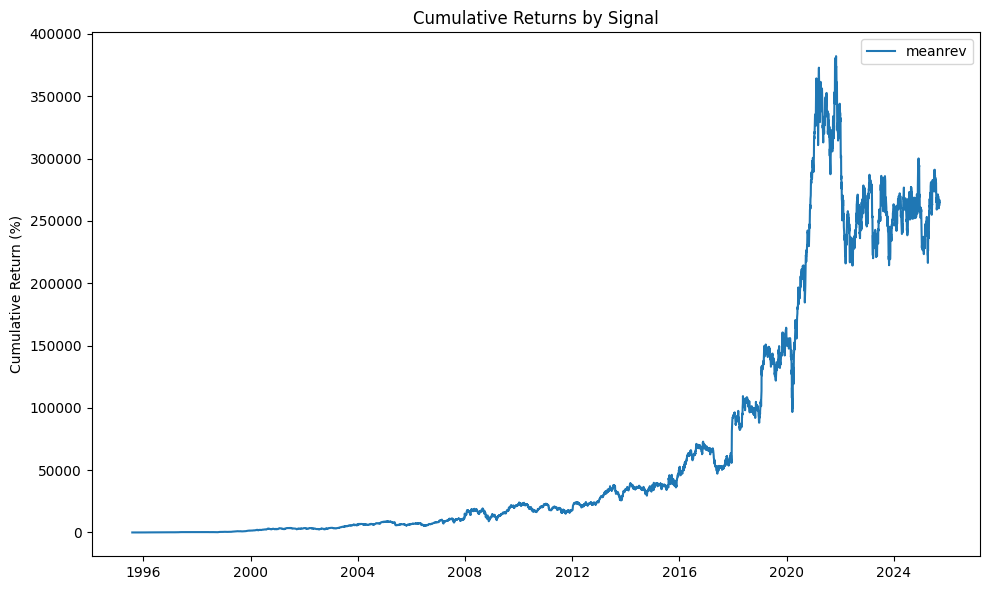

In [13]:
plt.figure(figsize=(10, 6))

# Plot each signal separately
#plt.plot(returns_bab["date"], returns_bab["cumulative_return"], label="bab")
plt.plot(returns_meanrev["date"], returns_meanrev["cumulative_return"], label="meanrev")
#plt.plot(returns_momentum["date"], returns_momentum["cumulative_return"], label="momentum")

# Labels & legend
plt.xlabel(None)
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns by Signal")
plt.legend()
plt.tight_layout()
plt.show()